In [1]:
import sys
from pathlib import Path
import os

# Add parent directory to path
notebook_path = Path(os.getcwd())
sys.path.insert(0, str(notebook_path.parent))

from bot.data import client
from bot.rules import *
from bot.config.utils import read_tickers, read_config

tickers = read_tickers()



In [ ]:
import pickle
from bot.data import load_ohlcv
from bot.rules.signal_filter import breakout, recent_atr_compression, volume_breakout
import pandas as pd

filters = [breakout, volume_breakout, recent_atr_compression]
names = ['breakout', 'volume_breakout', 'recent_atr_compression']
start_str = "1 year ago UTC"
timeframe = "30m"

reload = False

datas = {}
if reload:
    for ticker in tickers[:23]: 
        print(f"Processing {ticker}...")
        df = load_ohlcv(ticker, timeframe, start_str)
        datas[ticker] = df
    with open('intraday_crypto_test_datas.pkl', 'wb') as f:
        pickle.dump(datas, f)
else: 
    with open('intraday_crypto_test_datas.pkl', 'rb') as f:
        datas = pickle.load(f)

Processing BNBUSDT...
Processing BTCUSDT...
Processing ETHUSDT...
Processing TRXUSDT...
Processing XRPUSDT...
Processing LINKUSDT...
Processing ONTUSDT...
Processing ADAUSDT...


In [ ]:
config = read_config()

for ticker, df in datas.items():
    signals = {}
    scores = {}
    for filter, name in zip(filters, names):
        signals[name], scores[name+'_score'] = filter.vec(df, **{k:config[k] for k in filter.REQUIRES})
    df = pd.concat([df, pd.concat(signals, axis=1), pd.concat(scores, axis=1)], axis=1)
    datas[ticker] = df

In [6]:
df

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,...,recent_atr_compression,breakout_score,volume_breakout_score,recent_atr_compression_score,breakout,volume_breakout,recent_atr_compression,breakout_score,volume_breakout_score,recent_atr_compression_score
Close time,,,,,,,,,,,,,,,,,,,,,
2025-01-02 08:29:59.999,2025-01-02 08:00:00,706.95,709.13,706.89,707.80,5295.872,3749950.26532000,10572,3012.558,2.133018e+06,...,True,0.988128,1.373461,0.319444,False,True,True,0.988128,1.373461,0.319444
2025-01-02 08:59:59.999,2025-01-02 08:30:00,707.80,710.50,706.86,710.49,8385.015,5946148.22346000,13996,5124.736,3.634390e+06,...,True,0.991833,2.134828,0.305556,False,True,True,0.991833,2.134828,0.305556
2025-01-02 09:29:59.999,2025-01-02 09:00:00,710.49,711.40,708.91,711.30,6357.318,4515357.04333000,15014,3108.788,2.208272e+06,...,True,0.992975,1.618575,0.340278,False,True,True,0.992975,1.618575,0.340278
2025-01-02 09:59:59.999,2025-01-02 09:30:00,711.30,715.80,711.22,715.08,11139.358,7946532.35896000,22594,7001.806,4.994342e+06,...,True,0.998157,2.790481,0.340278,False,True,True,0.998157,2.790481,0.340278
2025-01-02 10:29:59.999,2025-01-02 10:00:00,715.08,715.50,711.87,713.14,6413.568,4574009.39983000,22642,3155.910,2.250345e+06,...,True,0.994285,1.592687,0.402778,False,True,True,0.994285,1.592687,0.402778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-29 22:29:59.999,2025-12-29 22:00:00,854.75,854.75,852.90,853.52,507.986,433591.06202000,6481,227.624,1.942925e+05,...,False,0.977147,0.293189,0.625000,False,False,False,0.977147,0.293189,0.625000
2025-12-29 22:59:59.999,2025-12-29 22:30:00,853.52,854.00,853.11,853.57,482.150,411591.08536000,4089,248.945,2.125039e+05,...,False,0.977277,0.278278,0.597222,False,False,False,0.977277,0.278278,0.597222
2025-12-29 23:29:59.999,2025-12-29 23:00:00,853.57,853.80,852.14,852.37,675.792,576598.44188000,6654,303.894,2.592606e+05,...,False,0.975940,0.390040,0.562500,False,False,False,0.975940,0.390040,0.562500


ValueError: Cannot index with multidimensional key

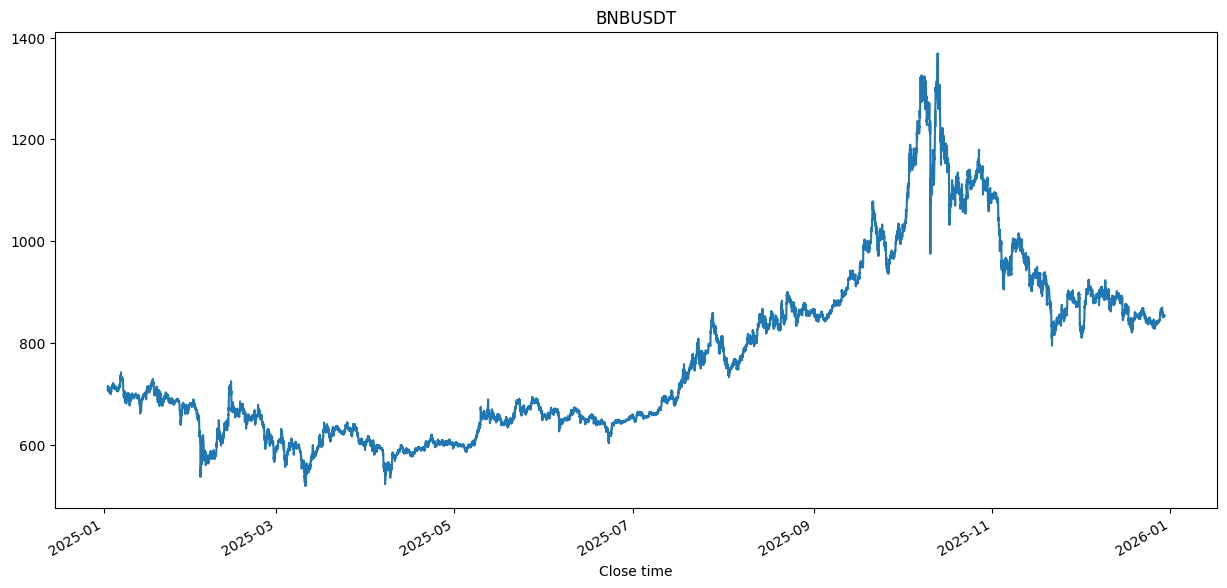

In [5]:
import matplotlib.pyplot as plt

for ticker in datas.keys():
    df = datas[ticker].dropna()

    ax = df['Close'].plot(title=ticker, figsize=(15,7))

    for name in names:
        signal_dates = df.loc[df[name]].index
        ax.scatter(signal_dates, df.loc[signal_dates]['Close'], label=name)
    
    signal_dates = df.loc[df['breakout'] & df['volume_breakout'] & df['recent_atr_compression']].index
    ax.scatter(signal_dates, df.loc[signal_dates]['Close'], label='all', color='black', marker='x', s=100)
    ax.set_yscale('log')

    ax.legend()

    plt.show()